c:\Users\acepi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


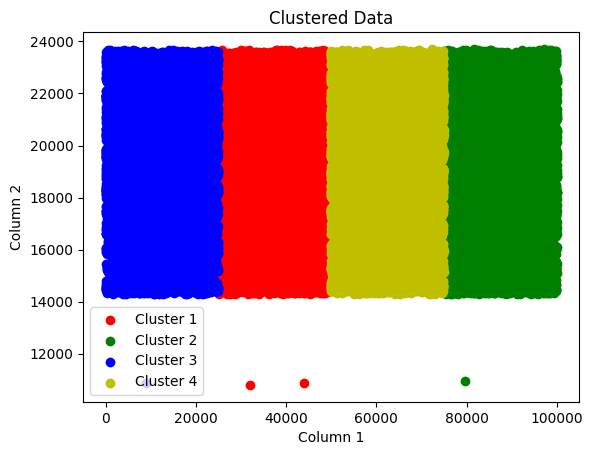

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Read the CSV file into a Pandas dataframe
data = pd.read_csv('Datos/base.csv', sep=';')

# Extract the values from the dataframe
data_values = data.values

# Define the number of clusters
num_clusters = 4

# Create a k-means object with the specified number of clusters
kmeans = KMeans(n_clusters=num_clusters)

# Fit the k-means object to the data
kmeans.fit(data_values)

# Get the cluster assignments for each data point
labels = kmeans.labels_

# Add the cluster assignments as a new column to the original dataframe
data['Cluster'] = labels

# Save the updated dataframe as a new CSV file
data.to_csv('Datos/filename_clustered.csv', index=False)

# Visualize the clusters using a scatter plot
colors = ['r', 'g', 'b', 'y'] # Define the colors for the clusters
for i in range(num_clusters):
    plt.scatter(data_values[labels==i, 0], data_values[labels==i, 1], c=colors[i], label='Cluster '+str(i+1))
plt.title('Clustered Data')
plt.xlabel('Column 1')
plt.ylabel('Column 2')
plt.legend()
plt.show()

In [8]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import pandas as pd

# Read the CSV file into a Pandas dataframe
data = pd.read_csv('Datos/base.csv')

# Convert the dataframe to a numeric data type
data = data.apply(pd.to_numeric, errors='coerce')

# Remove any rows with missing or NaN values
data = data.dropna()

# Extract the values from the dataframe
data_values = data.values

# Define the number of test points to generate
num_test_points = data.shape[0]

# Generate test points uniformly at random within the range of the data
test_points = np.random.uniform(np.min(data_values, axis=0), np.max(data_values, axis=0), size=(num_test_points, data.shape[1]))

# Calculate the distance between each data point and its nearest neighbor among the test points
nbrs = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(data_values)
dists_data, _ = nbrs.kneighbors(test_points)

# Calculate the distance between each test point and its nearest neighbor among the data points
nbrs = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(test_points)
dists_test, _ = nbrs.kneighbors(data_values)

# Calculate the Hopkins statistic
hopkins_statistic = np.sum(dists_data) / (np.sum(dists_data) + np.sum(dists_test))

print('Hopkins Statistic:', hopkins_statistic)

ValueError: zero-size array to reduction operation minimum which has no identity